# Deliverable 2: Data-Preprocessing

## Robert, Dave and Stan
--------------------------------------------------------------------------------------------------------------------------------


### We hope to predict the winner of the 2018 NBA Playoffs 
### Collected data from 

  1. https://www.cbssports.com/nba/standings 
      * This website was found using a google search. We scraped the end of season statistics to help give us viable features for our model.
  2. https://stats.nba.com/teams/traditional/?sort=W_PCT&dir=-1&Season=2017-18&SeasonType=Regular%20Season 
      * This website was found with a google search. We used sweat equity to uncover more final season statistics for playoff teams "for" and "against". This will help us when training our model with the playoff teams.

Question: Can we use machine learning, with statistics from the regular season and past playoff performances, to predict the outcome of the NBA playoffs? We want to investigate if we can successfully have a model that identifies key features in a winning team and then can predict future winners. The plan is to have the model train on statistics from previous seasons and associate those with the teams that won, and then run the statistics from this past season to see who will win the 2018 playoffs. 

In this deliverable, we gathered more data and preprocessed all of our data further to prepare it to be fed into a machine learning model in the next deliverable. Below are some of our visualizations of our data. The preprocessing steps can be found in "Preprocessing.ipynb" and "Series_Preprocess.ipynb". The final CSVs for the model can be found in the direcorty "./preprocessed/final/".

In [6]:
# Import necessary libraries 

import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy as sc
from scipy.stats import ttest_ind
import math

Below we import some the necessary csv's. We want to order the values by rank. You can see a preview of some of the data. The stats against are not used in visualizations, but we wanted to have them as well.

In [8]:
# Read necessary csv's of stats for top 16 teams and stats against top 16 teams
#     Also sort teams by ranking at end of the season, so teams go from left to right in graphs by ranking

stats_against_1314 = pd.read_csv("./preprocessed/opp_stats1314.csv", sep = ',')
stats_against_1415 = pd.read_csv("./preprocessed/opp_stats1415.csv", sep = ',')
stats_against_1516 = pd.read_csv("./preprocessed/opp_stats1516.csv", sep = ',')
stats_against_1617 = pd.read_csv("./preprocessed/opp_stats1617.csv", sep = ',')
stats_against_1718 = pd.read_csv("./preprocessed/opp_stats1718.csv", sep = ',')

stats_for_1314 = pd.read_csv("./preprocessed/team_stats1314.csv", sep = ',')
stats_for_1415 = pd.read_csv("./preprocessed/team_stats1415.csv", sep = ',')
stats_for_1516 = pd.read_csv("./preprocessed/team_stats1516.csv", sep = ',')
stats_for_1617 = pd.read_csv("./preprocessed/team_stats1617.csv", sep = ',')
stats_for_1718 = pd.read_csv("./preprocessed/team_stats1718.csv", sep = ',')

stats_for_1314.sort_values(by = ['Rk'])
stats_for_1415.sort_values(by = ['Rk'])
stats_for_1516.sort_values(by = ['Rk'])
stats_for_1617.sort_values(by = ['Rk'])
stats_for_1718.sort_values(by = ['Rk'])

stats_for_1415.head()

,Unnamed: 0,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,WIN%
0,0,1,Golden State Warriors*,82,240.6,41.6,87.0,0.478,10.8,27.0,...,10.4,34.3,44.7,27.4,9.3,6.0,14.5,19.9,110.0,81.7
1,1,4,LA Clippers*,82,240.6,39.4,83.3,0.473,10.1,26.9,...,9.6,33.1,42.6,24.8,7.8,5.0,12.3,21.3,106.7,68.3
2,2,9,Dallas Mavericks*,82,242.4,39.7,85.8,0.463,8.9,25.4,...,10.5,31.8,42.3,22.5,8.1,4.5,13.0,20.0,105.2,61.0
3,3,11,Toronto Raptors*,82,242.1,37.9,83.3,0.455,8.9,25.1,...,10.7,30.8,41.5,20.7,7.5,4.4,12.9,20.9,104.0,59.8
4,4,3,Houston Rockets*,82,241.5,37.0,83.3,0.444,11.4,32.7,...,11.7,32.0,43.7,22.2,9.5,5.0,16.7,22.0,103.9,68.3


Below, I want to condense vital information within the statistics for the purpose of calculating a correlation dataframe. 

In [9]:
# Cut down dataframe columns in order to see correlations between significant statistics with win %

stats_for_1314_corr = stats_for_1314[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]
stats_for_1516_corr = stats_for_1516[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]
stats_for_1617_corr = stats_for_1617[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]
stats_for_1718_corr = stats_for_1718[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]


stats_for_1415_corr = stats_for_1415[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]
stats_for_1415_corr.corr().tail(1)

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,WIN%
WIN%,0.472978,0.054229,0.572437,0.627015,0.477123,0.688882,-0.309409,-0.481912,0.649455,-0.350964,0.270662,0.038957,0.518273,0.37734,0.381006,-0.049746,-0.229414,0.730259,1.0


The following cells of python help us clean the data. We want to multiply the percentage statistics by 100 so that it is easier to visualize on a graph.

In [10]:
# Multiplies all percents by 100 for plotting
def make_perc(year):
    year['3P%'] = year['3P%'] * 100
    year['2P%'] = year['2P%'] * 100
    year['FG%'] = year['FG%'] * 100
    return year

Specifically, the following cell loops through all of the years and multiplies the percentages by 100. Then we plot a line graph for each of the statistics. The goal of these graphs is to visualize possible correlations between statistics. We plot a graph for each year, however they all mostly show the same thing. YOu can see a downward sloping line for statistics that are more correlated with each other. The team with the best end-of-season ranking is on the left, and the bottom team is on the right. Hence we can see in some statistics, win percentage, average points or 3 point attempts that there is a downward sloping line. 

Another important note for these 4 visualizations is the randomness of sports. It is difficult to predict sports in general, and we can see that many of the statistics are not correleated with winning percentage. The randomness of sports make it hard to predict because in theory, any team can beat anyone on any day, but we want to do our best with these correlated statistics because basketball is still a statistical game. 

C:\Users\Robert\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Robert\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Robert\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

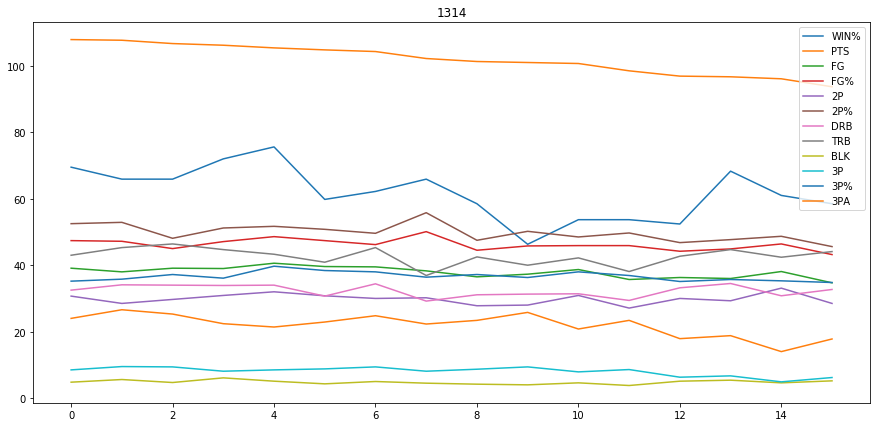

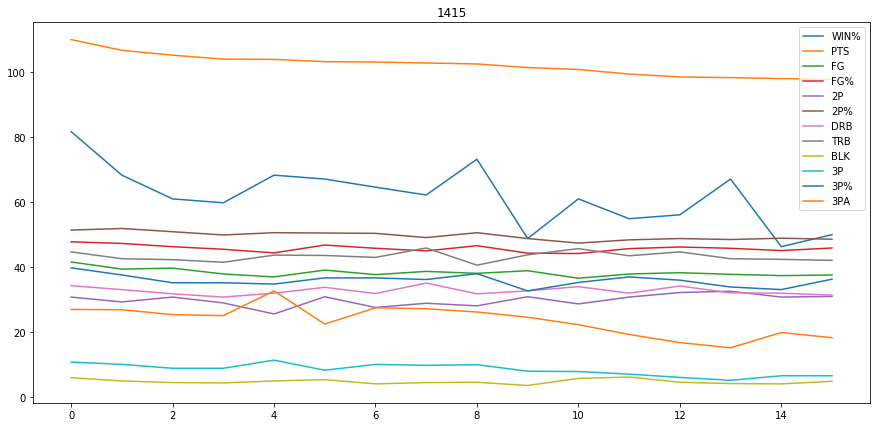

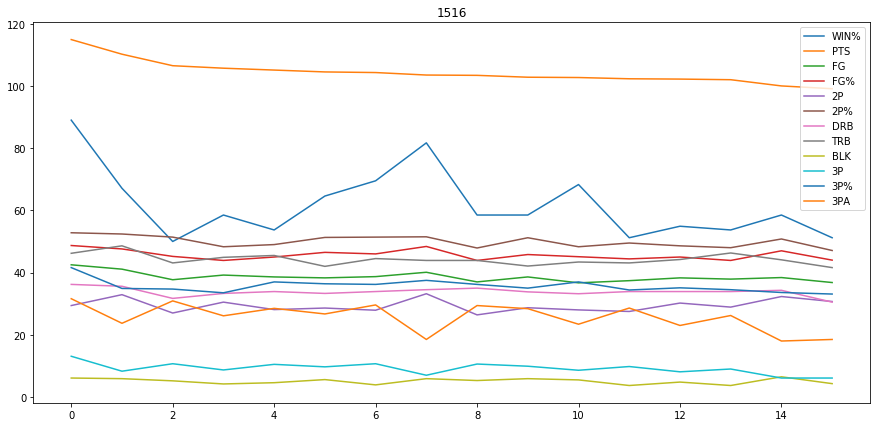

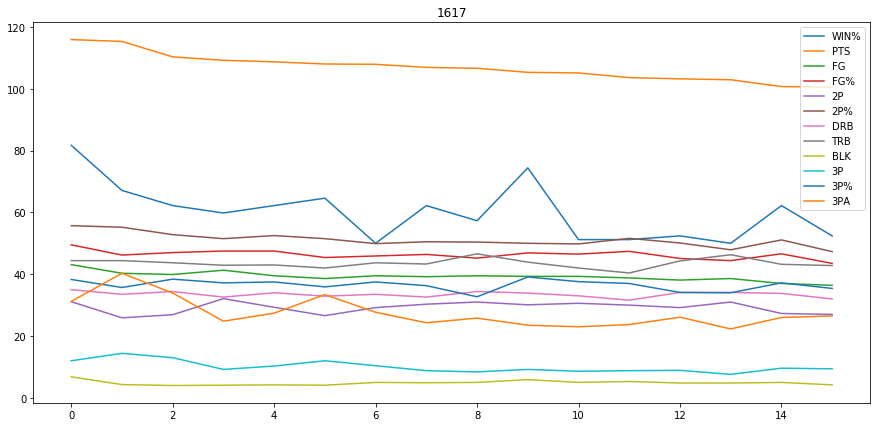

In [11]:
# Take the most correlated statistics with winning percentage in order to graph them and visualize trends
stats_for_1314_sign = stats_for_1314[['Team', 'WIN%', 'PTS', 'FG', 'FG%', '2P', '2P%', 'DRB', 'TRB', 'BLK', '3P', '3P%', '3PA']]
stats_for_1415_sign = stats_for_1415[['Team', 'WIN%', 'PTS', 'FG', 'FG%', '2P', '2P%', 'DRB', 'TRB', 'BLK', '3P', '3P%', '3PA']]
stats_for_1516_sign = stats_for_1516[['Team', 'WIN%', 'PTS', 'FG', 'FG%', '2P', '2P%', 'DRB', 'TRB', 'BLK', '3P', '3P%', '3PA']]
stats_for_1617_sign = stats_for_1617[['Team', 'WIN%', 'PTS', 'FG', 'FG%', '2P', '2P%', 'DRB', 'TRB', 'BLK', '3P', '3P%', '3PA']]

years = [stats_for_1314_sign, stats_for_1415_sign, stats_for_1516_sign, stats_for_1617_sign]

for year in years:
    year = make_perc(year)

stats_for_1314_sign.plot(title = '1314', figsize = (15, 7))
stats_for_1415_sign.plot(title = '1415', figsize = (15, 7))
stats_for_1516_sign.plot(title = '1516', figsize = (15, 7))
stats_for_1617_sign.plot(title = '1617', figsize = (15, 7))

In order to expand on the graphs above, we have taken some of the smaller statistics to visualize a possible downward curve. It appears that there is a slight downward curve, but with the drastic changes from team to team, we see again how difficult it may be to predict the winner of basketball games because statistics will never fully be able to estimate the potential of a team.

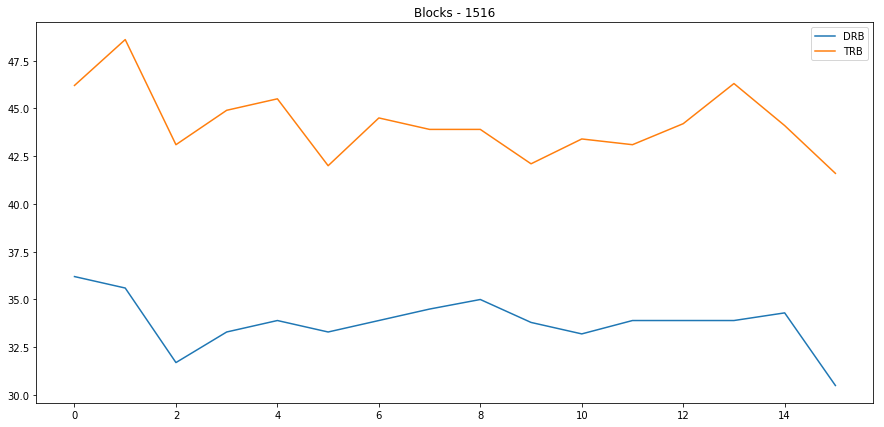

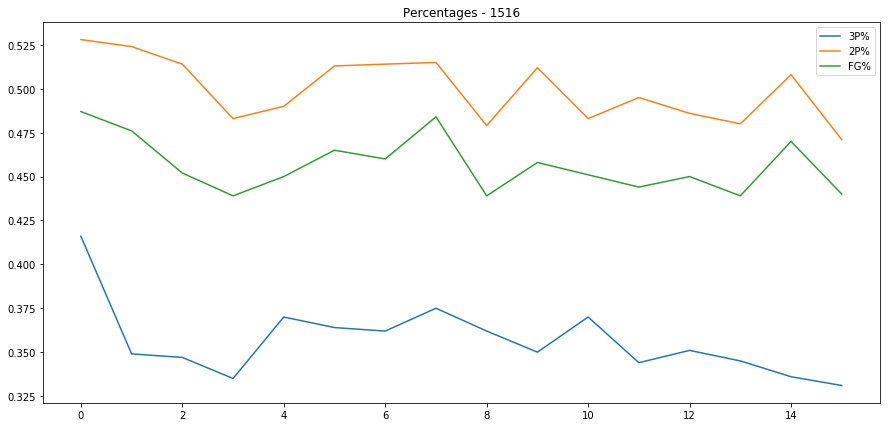

In [12]:
# In order to better visualize

stats_for_1516_blocks = stats_for_1516[['Team','DRB', 'TRB']]
stats_for_1516_perc = stats_for_1516[['Team','3P%', '2P%', 'FG%']]
stats_for_1516_blocks.plot(title = 'Blocks - 1516', figsize = (15, 7))
stats_for_1516_perc.plot(title = 'Percentages - 1516', figsize = (15,7))

Below is a chart describing the distribution of average points scored per game. We were curious to see if there was going to be a wide or small spread amongst the teams. We can see that there is not a wide spread, it appears that the distribution is peaked around 100-105 points per game. There is a little step for 110, but we expect that to be the top teams in each conference. 

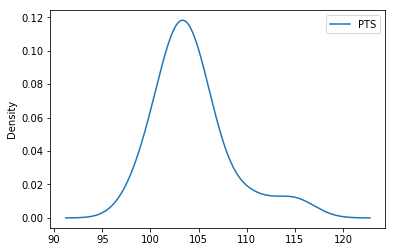

In [13]:
# A chart representing the distribution of average points per game 

stats_for_1516_pts = stats_for_1516[['Team', 'PTS']]
stats_for_1516_pts.plot(kind = 'density')

We wanted to test if this was a normal distrubtion. We can see that the p-value is extremely small, hence the probability that this data is a normal distrubtion is very unlikely. The first value returned represents the z-score from a skewtest squared plus the z-score from a kurtosis test. We can see that it is kind of large, hence illustrating that the distrubtion may be a peaked distribution. 

In [32]:
# A normal test done on the average points scored per game 

sc.stats.normaltest(stats_for_1516_pts['PTS'])

C:\Users\Robert\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=11.144367031956026, pvalue=0.0038021692647695602)

I was interested to see if normalizing the data would have any effect on the distrubtion. We can see that the p-value has increased to .5, thus there is a 50% chance that the distrubtion is normal. This is an indicator that we need to normalize all our values for the model. 

In [15]:
# Visualizing that a log of these values doesn't provide a better normalization of the data

normalized = np.linalg.norm(stats_for_1516_pts['PTS'])
stats_for_1516_pts['PTS'] = normalized
sc.stats.normaltest(stats_for_1516_pts['PTS'])

C:\Users\Robert\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Robert\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.077949753804829, pvalue=0.583345947370707)

The 4 cells below are all calculating pearson coefficients between a specific statistic and winning percentage. We wanted to investigate another correlation coefficient. We can see that all statistics except total rebounds have a significant correlation with winning percentage. 

In [16]:
# A pearson correlation completed between three point shot percentage and end of season winning percentage.

sc.stats.pearsonr(stats_for_1415_sign['3P%'], stats_for_1415_sign['WIN%'])

(0.6888822696996015, 0.0031637759226159985)

In [17]:
# Again with two point shot percentage and winning percentage

sc.stats.pearsonr(stats_for_1415_sign['2P%'], stats_for_1415_sign['WIN%'])

(0.649455078090175, 0.006475204149749237)

In [18]:
# Now the correlation between total rebounds and winning percentage: note that the correlation is small

sc.stats.pearsonr(stats_for_1415_sign['TRB'], stats_for_1415_sign['WIN%'])

(0.0389573533170677, 0.8860989875039211)

In [19]:
# A more highly correlation between total points per game and winning percentage

sc.stats.pearsonr(stats_for_1415_sign['PTS'], stats_for_1415_sign['WIN%'])

(0.7302594976875687, 0.0013171777509547937)

Below are two scatter plots with a statistic on the x axis and winning percentage on the y axis. We can see that for average points, which had a high correlation with winning percentage, the dots appear to be moving up as more points are scored. And for total rebounds, it is much more randomly scattered around. This is an indication that we may want to consider weighting highly correlated statistics more than others. 

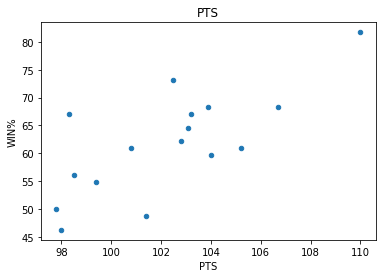

In [20]:
# A scatter plot of average points scored and win percentage 

scatter_pts = stats_for_1415_sign[['PTS', 'WIN%']]
scatter_pts.plot(title = 'PTS', x = 'PTS' , y = 'WIN%', kind = 'scatter')

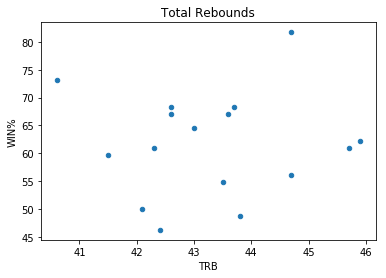

In [21]:
# A scatter plot of total rebounds and win percentage

trebounds = stats_for_1415_sign[['TRB', 'WIN%']]
trebounds.plot(title = "Total Rebounds", x = 'TRB', y = 'WIN%', kind = 'scatter')

The below code is simply a preparation for the final graph. 

In [22]:
# Here I collect the win percentage series for each year.

win_perc_1314 = stats_for_1314_corr.corr()['WIN%']
win_perc_1415 = stats_for_1415_corr.corr()['WIN%']
win_perc_1516 = stats_for_1516_corr.corr()['WIN%']
win_perc_1617 = stats_for_1617_corr.corr()['WIN%']
win_perc_1718 = stats_for_1718_corr.corr()['WIN%']

The final graph below represents the correlation between each statistic and winning percentage. We can see that winning percentage has a 1 correlation coefficient with itself, and some statistics stand out with a higher correlation while others represent statistcs with a low correlation to winning percentage. 

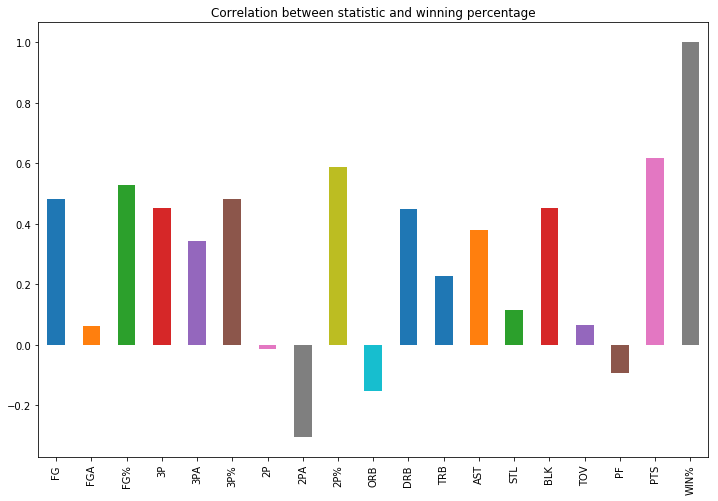

In [23]:
# Calculating the average correlations between the years and plot

avg_correlations = (win_perc_1314 + win_perc_1415 + win_perc_1516 + win_perc_1617 + win_perc_1718)/5
avg_correlations.plot(title = 'Correlation between statistic and winning percentage', figsize = (12, 8), kind = 'bar')